## MSDS 593 - EDA Final Project (Vineeth, Kris, and Sangjun)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.image as mpimg
from PIL import Image
import operator
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image

In [46]:
df = pd.read_csv("../Airbnb_Open_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

/var/folders/yx/vpn4pp6d44z8vryqc0zfxyp40000gn/T/ipykernel_42958/1994968746.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Airbnb_Open_Data.csv")


# 1. Data Cleaning

## 1.1 Delete duplicate keys

There are some duplicating observation exists, so we have to take it out before proceeding data visualization.

In [6]:
# 1. Delete duplicate keys
# delete duplicate ids
dups_keys = [i[0] for i in zip(df['id'].value_counts().keys(),df['id'].value_counts().values) if i[1]>1]
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.shape

(102058, 26)

## 1.2 Data type changes

'price' and 'service fee' were typed as object which are not correct. We are going to take out '$' and ',' and convert it to int value.

In [7]:
# 2. Data type changes

## price ##
df['price'] = df['price'].str.replace("$","").str.replace(",","")
df['price'] = df['price'].fillna(0).astype(int)

# get median value
price_median = df.loc[df['price'] != 0, 'price'].median()

df.loc[df['price'] == 0, 'price'] = price_median


## service fee ##
df['service fee'] = df['service fee'].str.replace("$","").str.replace(",","")
df['service fee'] = df['service fee'].fillna(0).astype(int)

# get median value
service_fee_median = df.loc[df['service fee'] != 0, 'service fee'].median()

df.loc[df['service fee'] == 0, 'service fee'] = service_fee_median
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_pol

Now, 'price' and 'service fee' are type 'int'.

## 1.3  Update mis-typed value

There are some mis-typed values. We are going to check variables: neighbourhood group, reviews per month, minimum nights, and availability 365.

In [8]:
# 1. neighbourhood group
df['neighbourhood group'] = df['neighbourhood group'].replace(['brookln'], 'Brooklyn').replace(['manhatan'], 'Manhattan')
df['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_pol

df is before imputation. After imputation, data will be named as 'data'.

range of reviews per month has to be in the range (0,30).

In [10]:
# 2. reviews per month

# copy the value before imputation
data = df.copy()

# if value of reviews per month is greater than 30, put it as na value.
# Later, I am going to change it to median value.
data.loc[data['reviews per month'] > 30, 'reviews per month']= np.nan
data.info()

# get median value
reviews_per_month_median = data.loc[data['reviews per month'] > 0, 'reviews per month'].median()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_pol

In [15]:
data.shape

(102058, 26)

Missing values have not been filled with median yet. Just put mis-typed value as NA.

In [11]:
# 3. minimum nights (to int)
data.loc[data['minimum nights'] < 0, 'minimum nights'] = 0

data['minimum nights'] = data['minimum nights'].fillna(0).astype(int)

# get median value
minumum_night_median = data.loc[data['minimum nights'] != 0, 'minimum nights'].median()

data.loc[data['minimum nights'] == 0, 'minimum nights'] = minumum_night_median

In [17]:
data.shape

(102058, 26)

In [18]:
data['minimum nights'].describe()

count    102058.000000
mean          8.126291
std          30.281670
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum nights, dtype: float64

'minimum nights' can't be below 1. First, we fill negative value into 0. Then fill 0 with median value.

In [12]:
#    availability 365
data.loc[data['availability 365'] < 0, 'availability 365'] = 0
data.loc[data['availability 365'] > 365, 'availability 365'] = 0

data['availability 365'] = data['availability 365'].fillna(0)

# get median value
availability_365_median = data.loc[data['availability 365'] != 0, 'availability 365'].median()

data.loc[data['availability 365'] < 0, 'availability 365'] = availability_365_median
data.loc[data['availability 365'] > 365, 'availability 365'] = availability_365_median

data['availability 365'].describe()

count    102058.000000
mean        129.739619
std         129.888095
min           0.000000
25%           0.000000
50%          87.000000
75%         248.000000
max         365.000000
Name: availability 365, dtype: float64

In [13]:
data.shape

(102058, 26)

the range of 'availability 365' should be from 0 to 365.

## 1.4 Data imputation

We are going to fill missing value with median value for numerical variables. For the categorical variables, we are going to put the value 'Undefined'.

In [14]:
# 4. Data imputation:
#    numerical variable => median value
data['number of reviews'] = data['number of reviews'].fillna(data['number of reviews'].median())
data['reviews per month'] = data['reviews per month'].fillna(data['reviews per month'].median())
data['review rate number'] = data['review rate number'].fillna(data['review rate number'].median())
data['calculated host listings count'] = data['calculated host listings count'].fillna(data['calculated host listings count'].median())

#    categorical variable => 'Undefined'
data['host_identity_verified'] = data['host_identity_verified'].fillna('Undefined')
data['neighbourhood group'] = data['neighbourhood group'].fillna('Undefined')
data['neighbourhood'] = data['neighbourhood'].fillna('Undefined')
data['country'] = data['country'].fillna('Undefined')
data['country code'] = data['country code'].fillna('Undefined')
data['instant_bookable'] = data['instant_bookable'].fillna('Undefined')
data['cancellation_policy'] = data['cancellation_policy'].fillna('Undefined')
data['last review'] = data['last review'].fillna('Undefined')

In [15]:
data.shape

(102058, 26)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          102058 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102058 non-null  object 
 6   neighbourhood                   102058 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         102058 non-null  object 
 10  country code                    102058 non-null  object 
 11  instant_bookable                102058 non-null  object 
 12  cancellation_pol

## 1.5 Create new variable

To get more insights, we create a new variable 'ratings' based on 'review rate number'.

In [16]:
# 5. Create New Variables: ratings
data['ratings'] = 'Medium'
data.loc[data['review rate number'] >=4, 'ratings'] = 'High'
data.loc[data['review rate number'] <=2, 'ratings'] = 'low'
data['ratings'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          102058 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102058 non-null  object 
 6   neighbourhood                   102058 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         102058 non-null  object 
 10  country code                    102058 non-null  object 
 11  instant_bookable                102058 non-null  object 
 12  cancellation_pol

## 1.6 Outliers

We are going to dealing with outliers before starting data visualization.

### minimum nights

In [25]:
data.shape

(102058, 27)

In [17]:
# Calculate the IQR for the 'total_bill' column
Q1 = data['minimum nights'].quantile(0.25)
Q3 = data['minimum nights'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# Define the whisker positions based on IQR
#lower_whisker = Q1 - 1.5 * IQR
upper_whisker = (1.5 * IQR) + Q3

print(upper_whisker)

3.0
9.5


In [18]:
data['minimum nights'].quantile([0.75,0.85,0.9,0.99,0.995,0.999,1])

0.750       5.00
0.850      16.00
0.900      30.00
0.990      50.00
0.995      90.00
0.999     349.43
1.000    5645.00
Name: minimum nights, dtype: float64

In [19]:
newdat = data[data['minimum nights'] < 50]

In [20]:
newdat.shape

(101009, 27)

### number of reviews

In [21]:
# Calculate the IQR for the 'total_bill' column
Q1 = newdat['number of reviews'].quantile(0.25)
Q3 = newdat['number of reviews'].quantile(0.75)
IQR = Q3 - Q1

# Define the whisker positions based on IQR
#lower_whisker = Q1 - 1.5 * IQR
upper_whisker = (1.5 * IQR) + Q3

print(upper_whisker)

76.0


In [31]:
newdat['number of reviews'].quantile([0.75,0.85,0.9,0.95,0.99,0.995,0.999,1]) # 150

0.750      31.000
0.850      59.000
0.900      82.000
0.950     125.000
0.990     232.000
0.995     284.960
0.999     419.984
1.000    1024.000
Name: number of reviews, dtype: float64

In [22]:
newdat1 = newdat[newdat['number of reviews'] < 300]

In [23]:
newdat1.shape

(100592, 27)

### reviews per month

In [24]:
# Calculate the IQR for the 'total_bill' column
Q1 = newdat1['reviews per month'].quantile(0.25)
Q3 = newdat1['reviews per month'].quantile(0.75)
IQR = Q3 - Q1

# Define the whisker positions based on IQR
#lower_whisker = Q1 - 1.5 * IQR
upper_whisker = (1.5 * IQR) + Q3

print(upper_whisker)

3.83


In [35]:
newdat1['reviews per month'].quantile([0.75,0.85,0.9,0.95,0.99,0.995,0.999,1]) # 10

0.750     1.70000
0.850     2.61000
0.900     3.24000
0.950     4.25000
0.990     6.54000
0.995     7.65000
0.999    10.17818
1.000    27.95000
Name: reviews per month, dtype: float64

In [25]:
newdat2 = newdat1[newdat1['reviews per month'] < 10]

In [26]:
newdat2.shape

(100472, 27)

### calculated host listings count

In [38]:
# Calculate the IQR for the 'total_bill' column
Q1 = newdat2['calculated host listings count'].quantile(0.25)
Q3 = newdat2['calculated host listings count'].quantile(0.75)
IQR = Q3 - Q1

# Define the whisker positions based on IQR
#lower_whisker = Q1 - 1.5 * IQR
upper_whisker = (1.5 * IQR) + Q3

print(upper_whisker)

3.5


In [39]:
newdat2['calculated host listings count'].quantile([0.75,0.85,0.9,0.95,0.97,0.98,0.99,0.995,0.999,1]) # 10

0.750      2.0
0.850      4.0
0.900      7.0
0.950     29.0
0.970     65.0
0.980    102.0
0.990    186.0
0.995    327.0
0.999    327.0
1.000    332.0
Name: calculated host listings count, dtype: float64

In [40]:
#newdat2[newdat2['calculated host listings count'] > 100]['neighbourhood group'].value_counts()

In [41]:
#newdat3 = newdat2[newdat2['calculated host listings count'] < 100]
newdat2.shape

(100472, 27)

# 2. Relationship between variables

We are going to find out some relationship between variables. Heatmap will present p-value for each combination of numerical and categorical variable.

## Heatmap

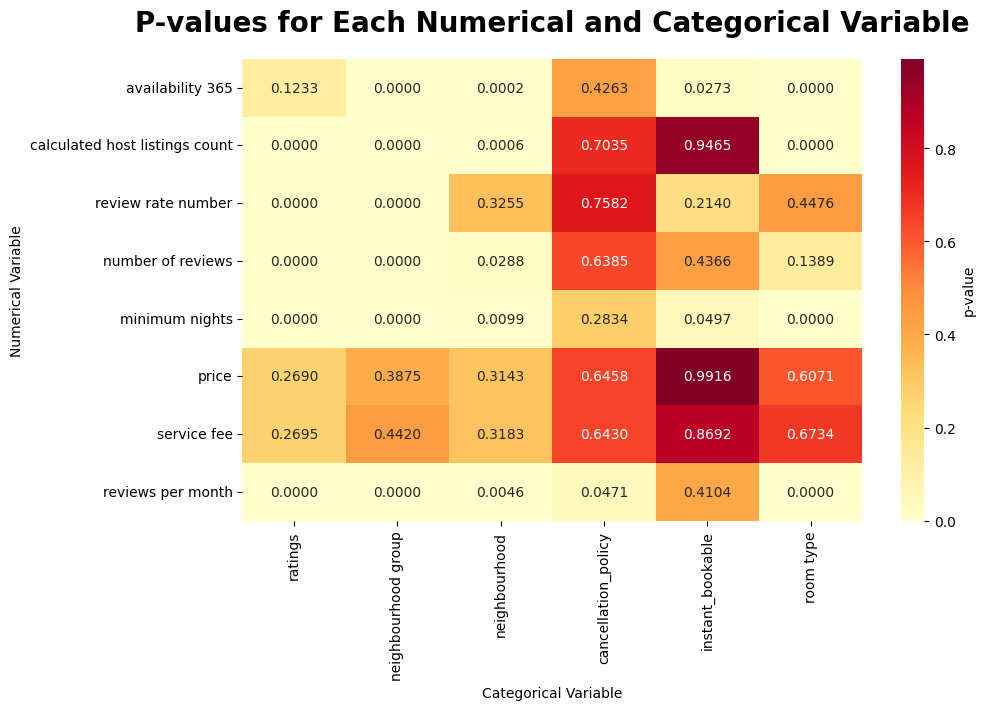

<Figure size 640x480 with 0 Axes>

In [27]:
# Define the numerical variables and the categorical variables
numerical_variables = ['availability 365', 'calculated host listings count', 'review rate number',
                       'number of reviews', 'minimum nights', 'price', 'service fee', 'reviews per month']
categorical_variables = ['ratings', 'neighbourhood group', 'neighbourhood', 'cancellation_policy',
                         'instant_bookable', 'room type']


# Custom function to calculate the p-value using t-test
def print_pval(x, y):
    return stats.ttest_ind(x, y).pvalue

# Create a DataFrame and store the p-values for each combination of numerical and categorical variable
pvalues = pd.DataFrame(index=numerical_variables, columns=categorical_variables)

# Calculate p-values for each combination
for n in numerical_variables:
    for c in categorical_variables:
        same_category_data = newdat2[newdat2[c] == newdat2[c].unique()[0]][n]
        diff_category_data = newdat2[newdat2[c] != newdat2[c].unique()[0]][n]

        # Calculate the p-value using the t-test between the two groups
        pvalues.loc[n, c] = print_pval(same_category_data, diff_category_data)


# Create a heatmap for p-values
plt.figure(figsize=(10, 6))
sns.heatmap(pvalues.astype(float), annot=True, cmap='YlOrRd', fmt='.4f', cbar_kws={'label': 'p-value'})
plt.title('P-values for Each Numerical and Categorical Variable', pad=20, fontweight='bold', fontsize=20)
plt.xlabel('Categorical Variable')
plt.ylabel('Numerical Variable')
plt.show()
plt.savefig('p values coeff')

When p-value is less than 0.05, we can say that two variables are significantly different from each other which means they have relations. As a result, neighbourhood group could be a great factor.

# 3 Data Visualization

### 3.1 How do we treat the mislabed value in Availability 365?

In [47]:
def scale_available_365(x):
    if x<0 or x>365:
        return df['availability 365'].median()
    else:
        return x

In [48]:
df['availability 365 scaled'] = df['availability 365'].apply(lambda x:scale_available_365(x))

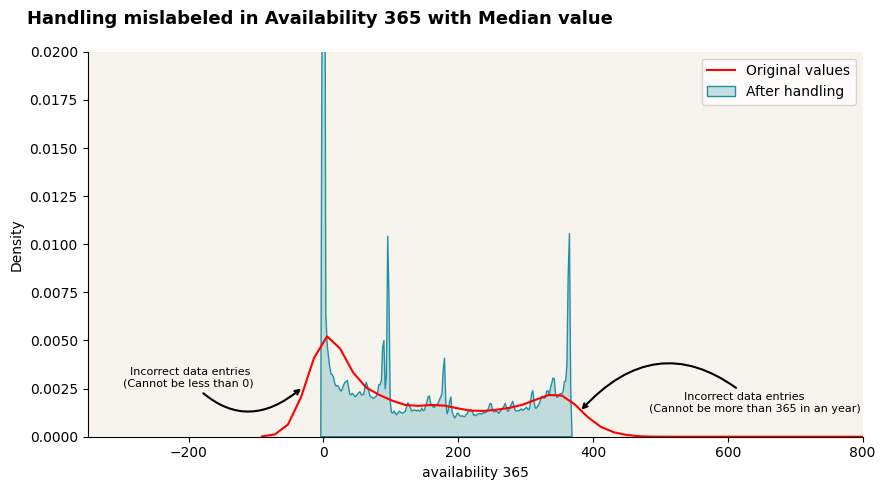

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
#x_scale_dens_plt = sns.kdeplot(data['availability 365'], bw_method=0.4).get_lines()[0].get_data()[0]
dens_plt = sns.kdeplot(df['availability 365'], bw_method=0.2, legend='original values', color='red').get_lines()[0].get_data()[1]
dens_plt_new = sns.kdeplot(df['availability 365 scaled'], bw_method=0.01, fill=True, legend='after handling', color='#2190a3').get_lines()[0].get_data()[1]
ax.set_xlim(-350,800)
ax.set_ylim(0,0.02)
ax.legend(['Original values','After handling'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_facecolor(color='#f7f4ed')
ax.set_title('Handling mislabeled in Availability 365 with Median value', x=0.3,y=1, fontsize=13, fontweight='bold',pad=20)
ax.annotate("  Incorrect data entries\n(Cannot be less than 0)", xy=(-30, 0.0026), xytext=(-130, 0.0),
            textcoords="offset points", arrowprops=dict(color = "black", arrowstyle="->",connectionstyle="arc3,rad=0.5", lw=1.5), fontsize=8, c='black')
ax.annotate("          Incorrect data entries\n(Cannot be more than 365 in an year)", xy=(380, 0.00129), xytext=(50, 0.0),
            textcoords="offset points", arrowprops=dict(color = "black", arrowstyle="->",connectionstyle="arc3,rad=0.5", lw=1.5), fontsize=8, c='black')
plt.show()
fig.savefig('handling_mislabeled')

The density plot for Availability 365 shows that there is a presence of mislabeled data in the dataset. The range of values for the availability 365 column should be between 0 and 365 but there is a presence of negative values and values greater than 365. We have treated these data points with the median of this column. The red curve represents the density distribution of original dataset while the blue density plot represents the distribution after replacing the mislabeled data points with the median value. We could see that there are no data points that are less than 0 and more than 365 in the new density curve.

## 3.2.1 Neighbourhood group vs. calculated host listings count by room type

In [29]:
new_dat4 = newdat2[newdat2['neighbourhood group'] != 'Undefined']
new_dat4['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        42809
Brooklyn         41118
Queens           12923
Bronx             2655
Staten Island      940
Name: count, dtype: int64

In [30]:
new_dat4['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [31]:
new_dat4.shape

(100445, 27)

/var/folders/yx/vpn4pp6d44z8vryqc0zfxyp40000gn/T/ipykernel_42958/790863554.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='neighbourhood group', y='calculated host listings count', hue='room type', data=new_dat4, ci=None, palette=colors)


Text(0, 0.5, 'Mean of Calculated Host Listings Count')

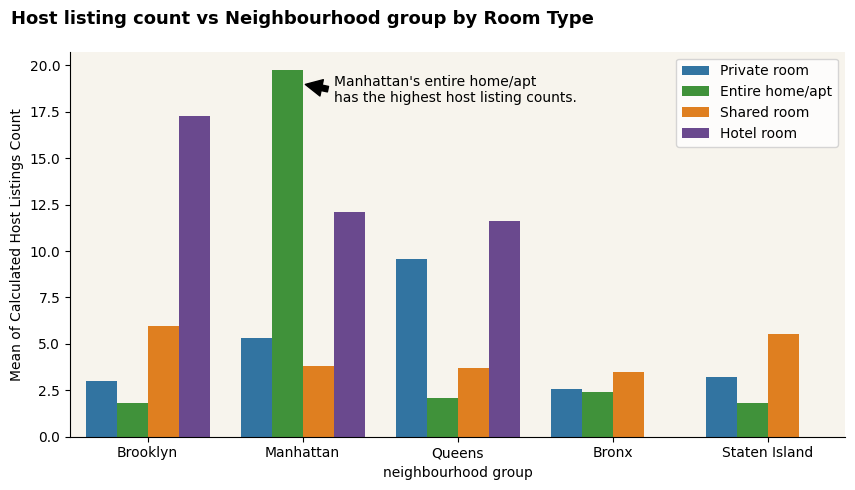

In [32]:
colors = ['#1f78b4', '#33a02c', '#ff7f00', '#6a3d9a']


# Draw plots
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='neighbourhood group', y='calculated host listings count', hue='room type', data=new_dat4, ci=None, palette=colors)


# set xticks
plt.xticks(range(len(new_dat4['neighbourhood group'].unique())), new_dat4['neighbourhood group'].unique())

# Change facecolor
ax.set_facecolor('#F0F0F0')

# Move legend
plt.legend(loc='upper right')

# Remove frames
sns.despine(top=True,right=True)

# add text box
text = "Manhattan's entire home/apt \nhas the highest host listing counts."  # The text you want to display in the text box
x_value = 1
y_value = 19
plt.annotate(text, xy=(x_value, y_value), xytext=(x_value + 0.2, y_value - 1),
             arrowprops=dict(facecolor='black', shrink=0.09))


ax.set_facecolor(color='#f7f4ed')
ax.set_title("Host listing count vs Neighbourhood group by Room Type", x=0.3,y=1, fontsize=13, fontweight='bold',pad=20)
ax.set_ylabel("Mean of Calculated Host Listings Count")


#plt.axvline(x=2.5, linestyle='dotted', color='red')
#bbox_props = dict(boxstyle="square,pad=0.3", fc='white', ec='black', lw=1.0)
#plt.text(x_value + 2.2, y_value + 8, text, ha="center", va="center", bbox=bbox_props, color= 'black', size = 9)

Brooklyn, Manhattan, and Queens are tourist region. Therefore, these region have relatively high demand of hotel rooms. On the other hand, Bronx and Staten Island are local area. Those areas have more availability in private room and shared room. It's hard to find hotel accomodation in those regions. Business people should focus on hotel accomodation in Brooklyn, Manhattan, and Queens, and put more efforts on how to flow in more private host because Bronx and Staten Island have more demand in private room and shared room.

## 3.2.2 Availability 365 vs. Neigbourhood group by Room Type

/var/folders/yx/vpn4pp6d44z8vryqc0zfxyp40000gn/T/ipykernel_42958/3550737592.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='neighbourhood group', y='availability 365', hue='room type', data=new_dat4, ci=None, palette=colors)


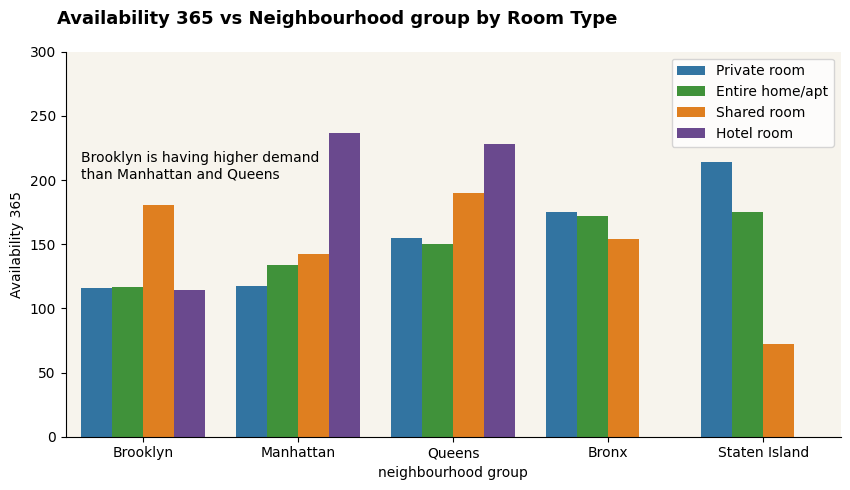

In [34]:
colors = ['#1f78b4', '#33a02c', '#ff7f00', '#6a3d9a']


# Draw plots
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='neighbourhood group', y='availability 365', hue='room type', data=new_dat4, ci=None, palette=colors)
ax.set_ylim(0,300)

# set xticks
plt.xticks(range(len(new_dat4['neighbourhood group'].unique())), new_dat4['neighbourhood group'].unique())

# Change facecolor
ax.set_facecolor('#F0F0F0')

# Move legend
plt.legend(loc='upper right')

# Remove frames
sns.despine(top=True,right=True)

# add text box
text = "Brooklyn is having higher demand \nthan Manhattan and Queens"  # The text you want to display in the text box
text1 = ""  # The text you want to display in the text box
x_value = -0.5
y_value = 200
plt.annotate(text, xy=(x_value, y_value), xytext=(x_value + 0.1, y_value + 1.5))
#plt.text(text, (0,200), s=10)

x_v = 1
y_v = 5


ax.set_facecolor(color='#f7f4ed')
ax.set_title("Availability 365 vs Neighbourhood group by Room Type", x=0.35,y=1, fontsize=13, fontweight='bold',pad=20)
ax.set_ylabel("Availability 365")

plt.savefig("availability 365.png", bbox_inches='tight')


Compared to previous plot, Brooklyn has the relatively low availability which means that it has higher demand than Manhattan and Queens.

## 3.3

In [54]:
newdat2["neighbourhood group"].value_counts()

Manhattan        42809
Brooklyn         41118
Queens           12923
Bronx             2655
Staten Island      940
Undefined           27
Name: neighbourhood group, dtype: int64

In [37]:
manhattan_data = newdat2.loc[newdat2["neighbourhood group"] == "Manhattan"]
print(manhattan_data.shape)
words = ' '.join(manhattan_data[~manhattan_data['house_rules'].isna()]['house_rules'].astype(str).str.lower())
word_dict = WordCloud().process_text(words)
manhattan_dict = dict( sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True))
manhattan_dict

(42809, 27)


{'smoking': 9045,
 'pet': 4669,
 'check': 4541,
 'guest': 4201,
 'will': 3583,
 'respectful': 3316,
 'home': 3256,
 'time': 3151,
 'house': 3024,
 'use': 2604,
 'neighbor': 2572,
 'apartment': 2428,
 'allowed': 2317,
 'don t': 2194,
 'parties': 2151,
 'clean': 2109,
 'building': 1936,
 'need': 1928,
 'unit': 1866,
 'leave': 1817,
 'ask': 1750,
 'stay': 1738,
 'respect': 1695,
 'house rule': 1668,
 'place': 1629,
 'property': 1592,
 'shoe': 1352,
 'kitchen': 1264,
 'smoke': 1244,
 'pm': 1219,
 'room': 1212,
 'booking': 1105,
 'residential building': 1102,
 'keep': 1086,
 'local time': 1074,
 't allow': 1074,
 'please remember': 1063,
 'please keep': 1057,
 'building rule': 1049,
 'loud music': 1040,
 'year round': 1040,
 'smoking allowed': 1027,
 'occupancy restrictions': 988,
 'round tenant': 988,
 'security deposit': 984,
 'found': 980,
 'quiet hours': 970,
 'let us': 968,
 'thank': 964,
 'tenants must': 964,
 'bathroom': 959,
 'us know': 955,
 'treat': 938,
 'rules apartment': 929,
 

In [38]:
brooklyn_data = newdat2.loc[newdat2["neighbourhood group"] == "Brooklyn"]
print(brooklyn_data.shape)
words = ' '.join(brooklyn_data[~brooklyn_data['house_rules'].isna()]['house_rules'].astype(str).str.lower())
word_dict = WordCloud().process_text(words)
brooklyn_dict = dict( sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True))
brooklyn_dict

(41118, 27)


{'smoking': 8478,
 'pet': 4262,
 'check': 4225,
 'guest': 4186,
 'will': 3315,
 'respectful': 3227,
 'home': 3207,
 'time': 2862,
 'house': 2816,
 'apartment': 2417,
 'neighbor': 2408,
 'use': 2169,
 'allowed': 2134,
 'parties': 2112,
 'clean': 2036,
 'building': 1923,
 'don t': 1893,
 'need': 1803,
 'unit': 1765,
 'leave': 1728,
 'stay': 1724,
 'ask': 1609,
 'respect': 1545,
 'house rule': 1492,
 'place': 1405,
 'property': 1337,
 'shoe': 1315,
 'kitchen': 1314,
 'keep': 1289,
 'smoke': 1111,
 'room': 1107,
 'residential building': 1079,
 'please remember': 1025,
 'pm': 1022,
 'thank': 1020,
 'building rule': 1012,
 'year round': 1005,
 'bathroom': 965,
 'occupancy restrictions': 963,
 'round tenant': 963,
 'please keep': 957,
 'tenants must': 949,
 'loud music': 940,
 'space': 932,
 'smoking allowed': 924,
 'quiet hours': 922,
 'local time': 916,
 't allow': 916,
 'treat': 915,
 'rules apartment': 914,
 'apartment occupancy': 914,
 'booking': 896,
 'security deposit': 879,
 'let us':

In [39]:
queens_data = newdat2.loc[newdat2["neighbourhood group"] == "Queens"]
print(queens_data.shape)
words = ' '.join(queens_data[~queens_data['house_rules'].isna()]['house_rules'].astype(str).str.lower())
word_dict = WordCloud().process_text(words)
queens_dict = dict( sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True))
queens_dict

(12923, 27)


{'smoking': 2872,
 'guest': 1555,
 'check': 1444,
 'pet': 1373,
 'will': 1238,
 'house': 1170,
 'please': 1074,
 'home': 940,
 'respectful': 918,
 'time': 846,
 'apartment': 794,
 'clean': 758,
 'allowed': 756,
 'use': 743,
 'neighbor': 735,
 'parties': 718,
 'building': 576,
 'don t': 574,
 'unit': 561,
 'stay': 558,
 'ask': 522,
 'leave': 515,
 'need': 493,
 'room': 464,
 'kitchen': 440,
 'respect': 437,
 'keep': 425,
 'property': 407,
 'shoe': 404,
 'house rule': 393,
 'place': 390,
 'thank': 348,
 'booking': 341,
 'trash': 341,
 'residential building': 327,
 'treat': 325,
 'reservation': 316,
 'please remember': 311,
 'pm': 304,
 'building rule': 301,
 'smoke': 300,
 'must': 294,
 'year round': 293,
 'occupancy restrictions': 289,
 'round tenants': 289,
 'tenants must': 287,
 'bathroom': 284,
 'space': 284,
 'please leave': 283,
 'local time': 280,
 't allow': 280,
 'rules apartment': 275,
 'apartment occupancy': 275,
 'loud music': 267,
 'security deposit': 266,
 'one': 264,
 'smo

In [40]:
bronx_data = newdat2.loc[newdat2["neighbourhood group"] == "Bronx"]
print(bronx_data.shape)
words = ' '.join(bronx_data[~bronx_data['house_rules'].isna()]['house_rules'].astype(str).str.lower())
word_dict = WordCloud().process_text(words)
bronx_dict = dict( sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True))
bronx_dict

(2655, 27)


{'please': 574,
 'smoking': 561,
 'guest': 418,
 'pet': 416,
 'check': 322,
 'will': 320,
 'house': 251,
 'apartment': 211,
 'building': 196,
 'time': 194,
 'use': 188,
 'parties': 186,
 'stay': 179,
 'clean': 178,
 'respectful': 168,
 'home': 162,
 'neighbor': 157,
 'allowed': 151,
 'quiet': 137,
 'place': 127,
 'kitchen': 121,
 'keep': 119,
 'don t': 118,
 'need': 116,
 'room': 113,
 'unit': 110,
 'respect': 106,
 'property': 106,
 'ask': 105,
 'shoe': 105,
 'house rule': 94,
 'booking': 93,
 'trash': 91,
 'space': 82,
 'leave': 76,
 'pm': 76,
 'may': 76,
 'must': 71,
 'outside': 70,
 'one': 69,
 'security deposit': 69,
 'lock': 68,
 'smoke': 67,
 'bathroom': 66,
 'key': 66,
 'premise': 66,
 'smoking inside': 64,
 'staying': 62,
 'noise': 60,
 'thank': 60,
 'residential building': 60,
 'charge': 59,
 'please remember': 59,
 'local time': 58,
 't allow': 58,
 'name': 57,
 'enjoy': 56,
 'host': 55,
 'left': 55,
 'drug': 55,
 'night': 54,
 'treat': 53,
 'year round': 53,
 'smoking allow

In [41]:
staten_data = newdat2.loc[newdat2["neighbourhood group"] == "Staten Island"]
print(staten_data.shape)
words = ' '.join(staten_data[~staten_data['house_rules'].isna()]['house_rules'].astype(str).str.lower())
word_dict = WordCloud().process_text(words)
staten_dict = dict( sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True))
staten_dict

(940, 27)


{'please': 290,
 'smoking': 227,
 'guest': 147,
 'pet': 147,
 'will': 133,
 'check': 129,
 'house': 95,
 'parties': 78,
 'allowed': 76,
 'building': 72,
 'clean': 65,
 'time': 60,
 'home': 57,
 'respectful': 56,
 'neighbor': 56,
 'place': 51,
 'keep': 49,
 'stay': 48,
 'use': 48,
 'leave': 48,
 'room': 47,
 'apartment': 46,
 'property': 46,
 'need': 46,
 'shoes': 45,
 'ask': 42,
 'space': 41,
 'quiet': 39,
 'respect': 38,
 'kitchen': 37,
 'must': 36,
 'don t': 36,
 'treat': 35,
 'pm': 35,
 'reservation': 33,
 'trash': 30,
 'pets please': 30,
 'name': 29,
 'house rule': 29,
 'residential building': 28,
 'unit': 27,
 'inside': 27,
 'building rules': 27,
 'one': 26,
 'door': 26,
 'key': 26,
 'thank': 25,
 'know': 25,
 'booking': 25,
 'food': 25,
 'security deposit': 25,
 'smoke': 24,
 'please remember': 24,
 'rules apartment': 24,
 'apartment occupancy': 24,
 'occupancy restrictions': 24,
 'year round': 24,
 'round tenants': 24,
 'tenants must': 24,
 'provided': 23,
 'smoking allowed': 23

/var/folders/yx/vpn4pp6d44z8vryqc0zfxyp40000gn/T/ipykernel_42958/4081463146.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","5%","10%","15%","20%","25%","30%"])


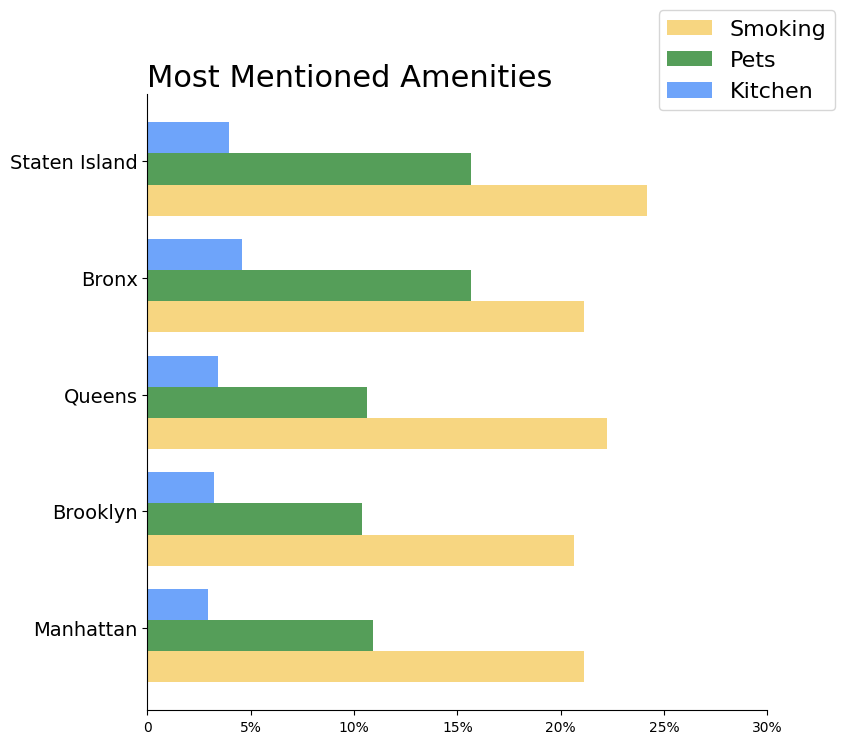

In [42]:
lux = ["smoking", 'pet', 'kitchen']
man_top = [manhattan_dict.get(i)/newdat2["neighbourhood group"].value_counts()['Manhattan'] for i in lux]
brook_top = [brooklyn_dict.get(i)/newdat2["neighbourhood group"].value_counts()['Brooklyn'] for i in lux]
queens_top = [queens_dict.get(i)/newdat2["neighbourhood group"].value_counts()['Queens']  for i in lux]
bronx_top = [bronx_dict.get(i)/newdat2["neighbourhood group"].value_counts()['Bronx'] for i in lux]
staten_top = [staten_dict.get(i)/newdat2["neighbourhood group"].value_counts()['Staten Island'] for i in lux]

smoking = [man_top[0], brook_top[0], queens_top[0], bronx_top[0], staten_top[0]]
pet = [man_top[1], brook_top[1], queens_top[1], bronx_top[1], staten_top[1]]
kit = [man_top[2], brook_top[2], queens_top[2], bronx_top[2], staten_top[2]]

fig, ax = plt.subplots(figsize=(8,8))
bars = np.array([1,2,3,4,5])*3
ax.set_xlim(0,0.3)
ax.barh(bars, 0)
ax.barh(y=bars, width=smoking, color="#f7d681", label="Smoking")
ax.barh(y=bars+0.8, width=pet, color="#559e59", label="Pets")
ax.barh(y=bars+1.6,width=kit, color="#6ea4fa", label="Kitchen")
plt.title(label="Most Mentioned Amenities", fontsize=22, loc='left')
fig.legend(loc="upper right", fontsize=16)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticklabels(["0","5%","10%","15%","20%","25%","30%"])
ax.set_yticks([4,7,10,13,16])
ax.set_yticklabels(["Manhattan","Brooklyn","Queens","Bronx","Staten Island"], fontsize=14)
fig.savefig("word_cloud_bar.png", bbox_inches='tight')

In [44]:
def assign_color(x):
    if x=='Bronx':
        return 'blue'
    elif x=='Brooklyn':
        return 'red'
    elif x=='Manhattan':
        return 'yellow'
    elif x=='Queens':
        return 'green'
    elif x=='Staten Island':
        return 'black'
    else:
        return 'orange'

## 3.4 Word Cloud

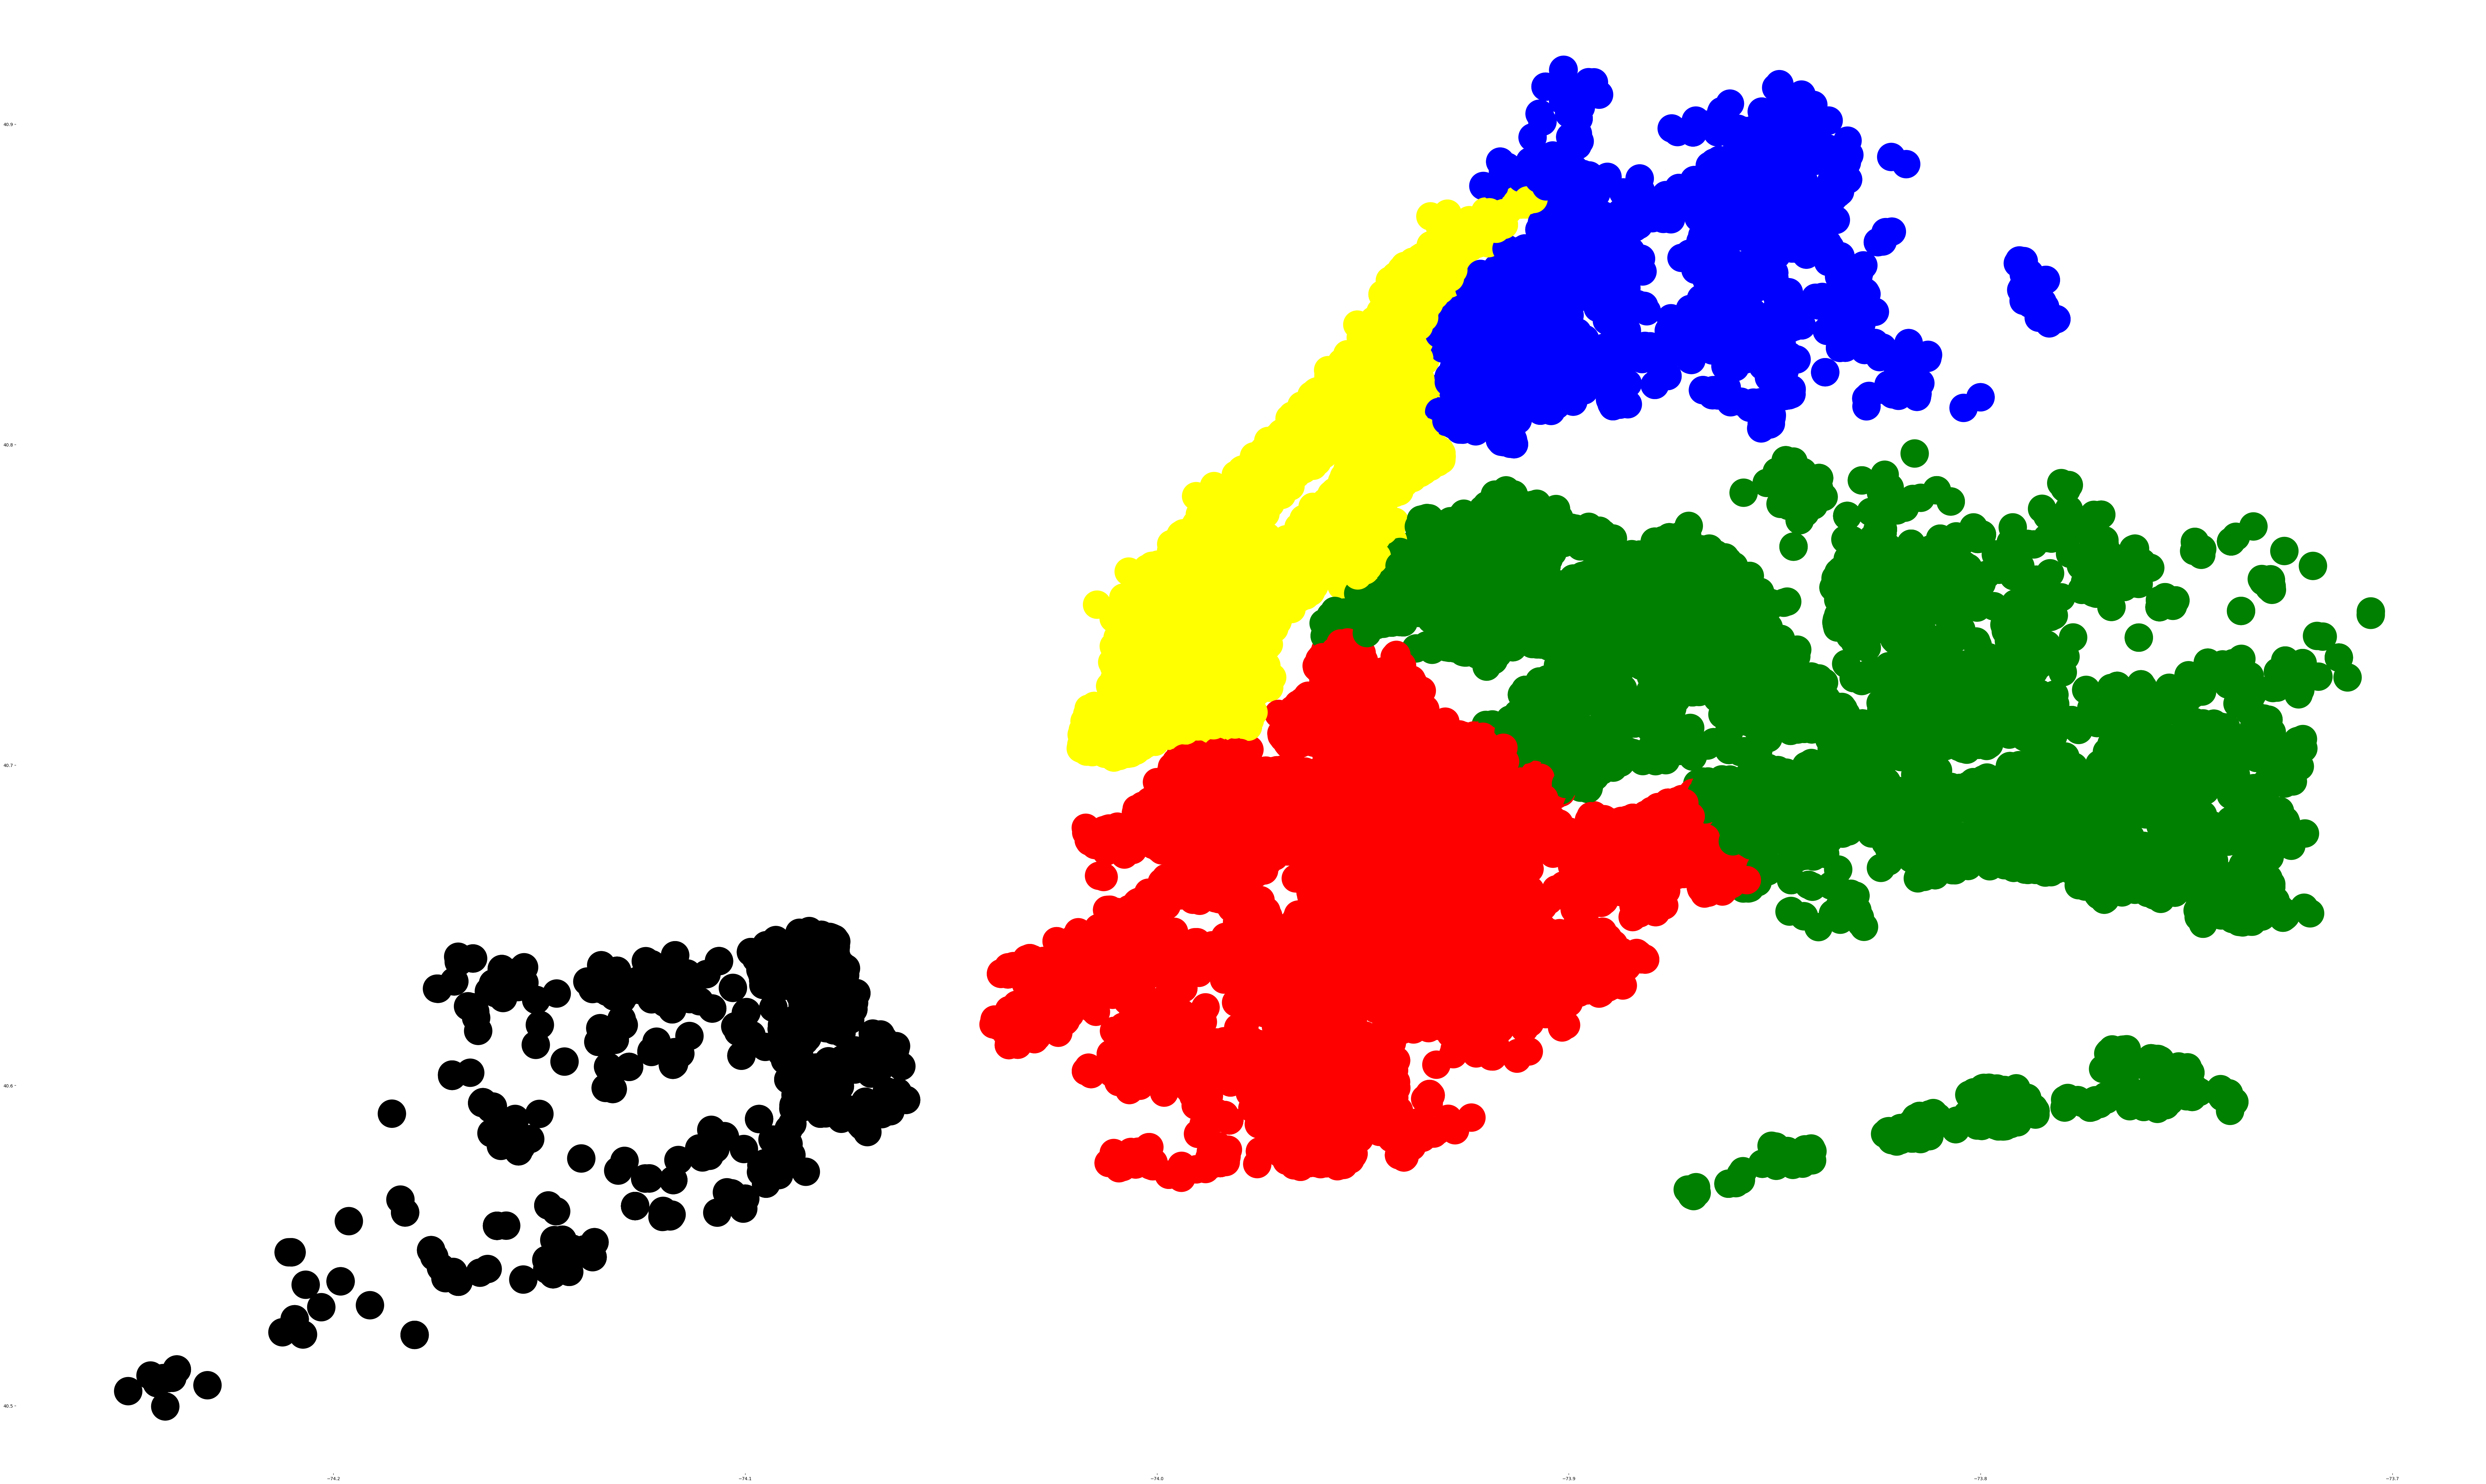

In [82]:
df['colours_neighbourhood'] = df['neighbourhood group'].apply(lambda x:assign_color(x))
fig, ax = plt.subplots(figsize=(100,60))
x = df['long']
y = df['lat']
z = df['colours_neighbourhood']
ax.scatter(x,y,s=4000,c=z)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.savefig('check1')
#plt.show()

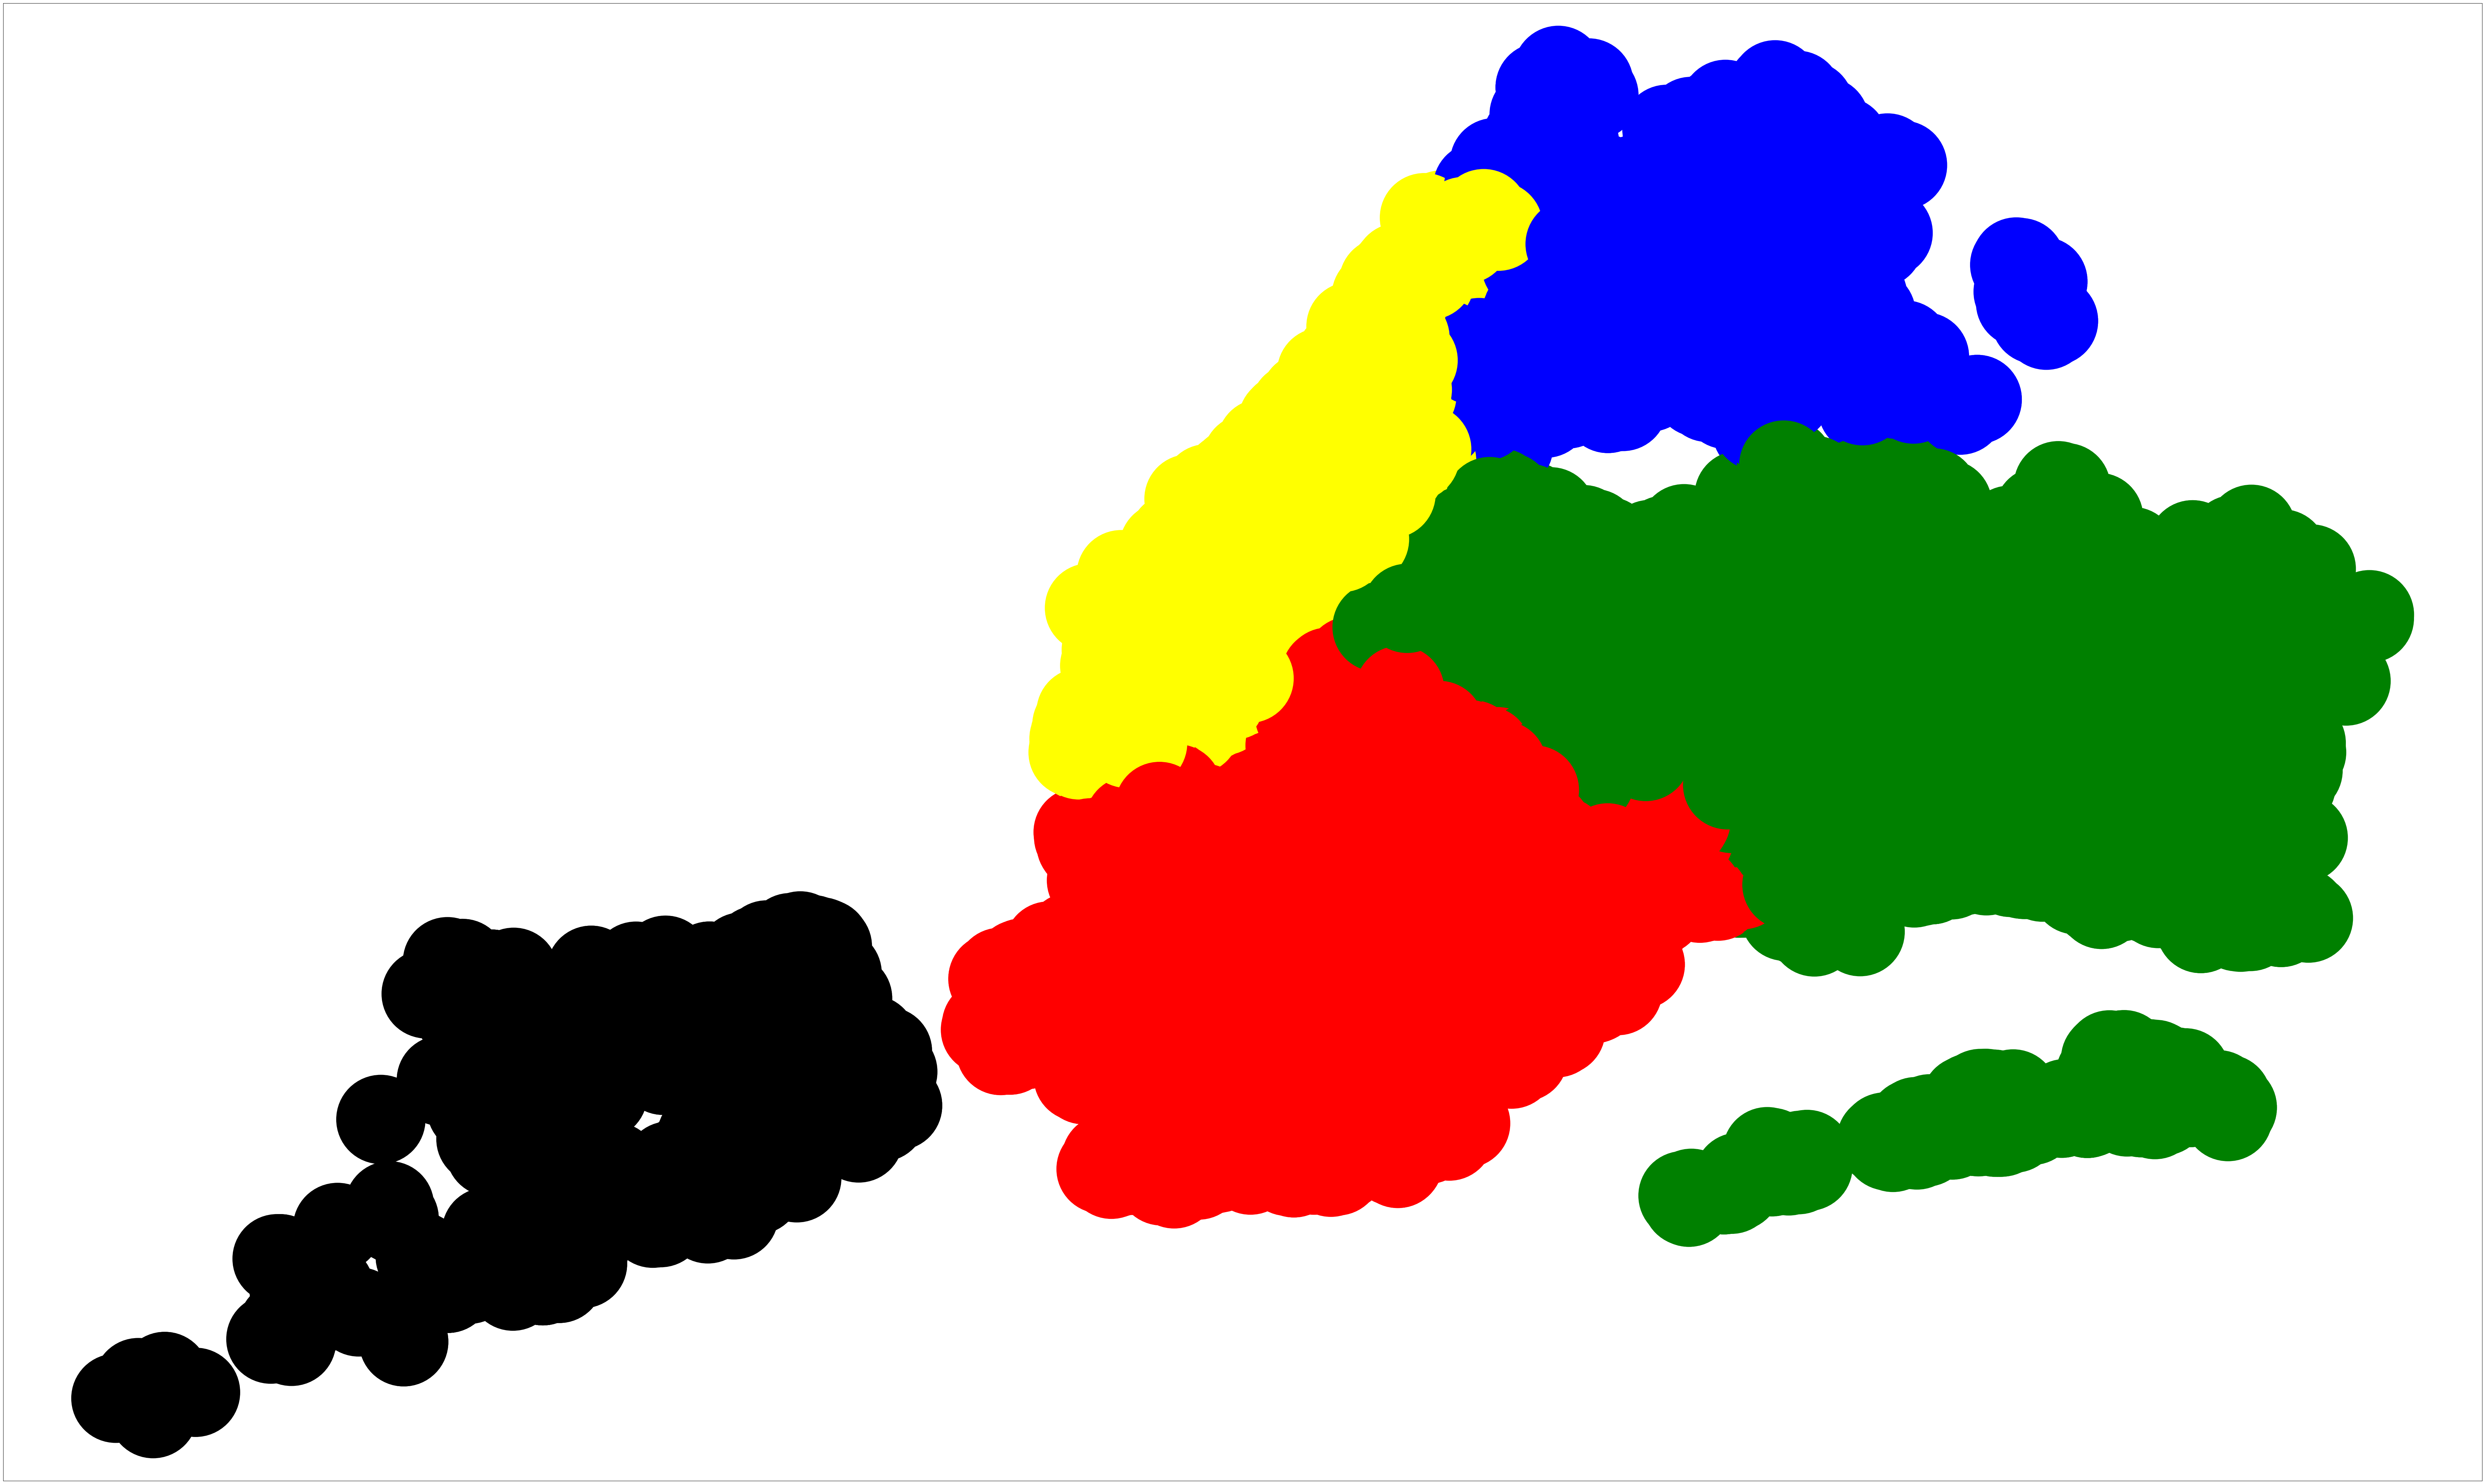

In [48]:
df['colours_neighbourhood'] = df['neighbourhood group'].apply(lambda x:assign_color(x))
fig, ax = plt.subplots(figsize=(100,60))
x = df['long']
y = df['lat']
z = df['colours_neighbourhood']
ax.scatter(x,y,s=40000,c=z)
ax.tick_params(
    top=False,
    left=False,
    right=False,
    bottom=False,
    labelleft=False,
    labelbottom=False
)
fig.savefig('check',bbox_inches='tight')
plt.show()

In [50]:
text_data = ' '.join(df['house_rules'].astype(str).str.lower())

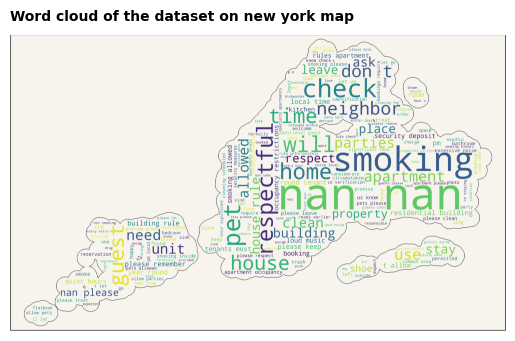

<Figure size 640x480 with 0 Axes>

In [51]:
from wordcloud import STOPWORDS
from PIL import Image
mask = np.array(Image.open('check.png'))
wc = WordCloud(width=1000,height=500,stopwords=STOPWORDS, mask=mask, background_color='#f7f4ed',contour_width=5, contour_color='black').generate_from_text(text_data)
#wc.recolor(color_func=test_color_func)
plt.imshow(wc)
plt.axis("off")
#plt.text(0,6,'Survey category | Percent favorable', c='black',size=5, horizontalalignment='center', verticalalignment='center')
plt.title('Word cloud of the dataset on new york map', c='black',size=10, pad=10, weight = 'bold', loc='left')
plt.show()
plt.savefig('word_cloud')

In [74]:
newdat2["neighbourhood group"].value_counts()
newdat2[["neighbourhood group", "price"]].groupby("neighbourhood group").describe()

price                                              \
                       count        mean         std   min    25%    50%   
neighbourhood group                                                        
Bronx                 2655.0  629.040678  323.815961  50.0  357.5  633.0   
Brooklyn             41118.0  626.526898  331.457057  50.0  342.0  625.0   
Manhattan            42809.0  623.005700  330.730297  50.0  339.0  624.0   
Queens               12923.0  629.463128  333.947747  50.0  340.0  625.0   
Staten Island          940.0  622.448936  324.992846  50.0  343.0  625.0   
Undefined               27.0  661.740741  330.049599  54.0  392.5  651.0   

                                    
                       75%     max  
neighbourhood group                 
Bronx                906.5  1200.0  
Brooklyn             913.0  1200.0  
Manhattan            910.0  1200.0  
Queens               921.0  1200.0  
Staten Island        905.0  1200.0  
Undefined            952.5  1133.0

## 3.5 Price Map

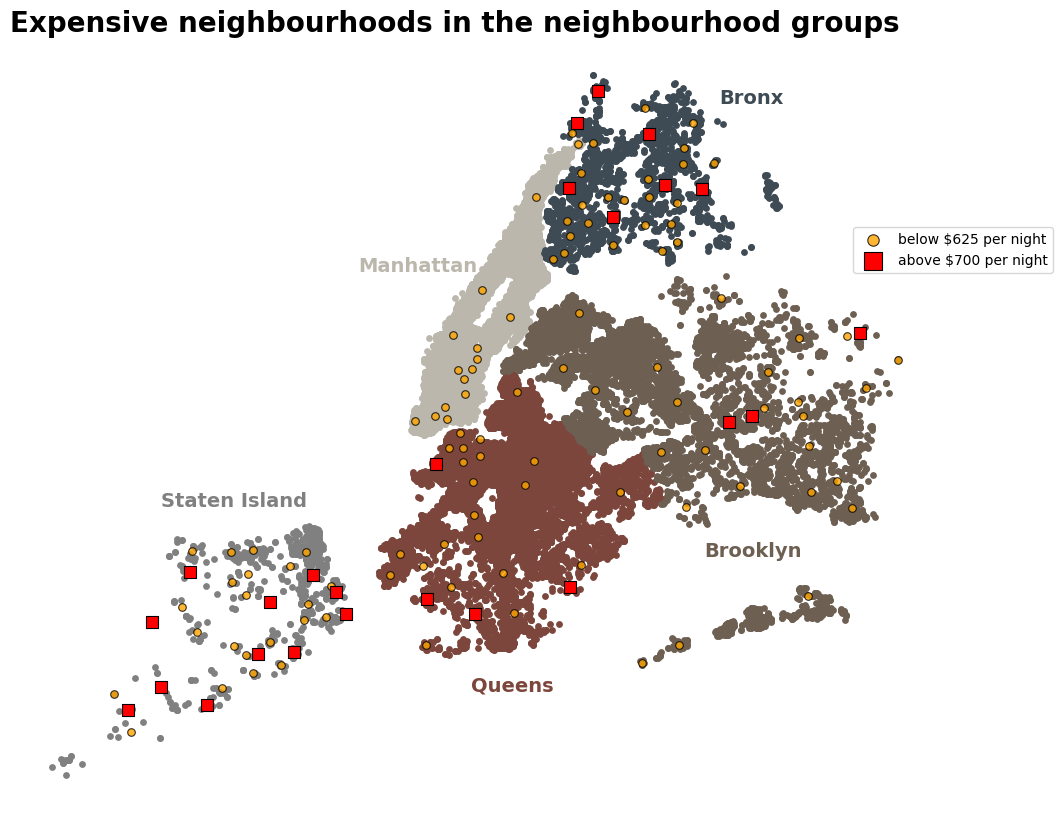

In [78]:
hood_mean = newdat2[["price", "neighbourhood","lat","long"]].groupby("neighbourhood").mean()
hood_mean.sort_values(by="price", inplace=True, ascending=False)

low = hood_mean.loc[hood_mean["price"] < 625]
med = hood_mean.loc[hood_mean["price"].between(626,999)]
high = hood_mean.loc[hood_mean["price"] > 700]

borders = (newdat2["lat"].min(), newdat2["long"].min(), newdat2["lat"].max(), newdat2["long"].max())
fig, ax = plt.subplots(figsize=(12,10))

manhattan = newdat2.loc[newdat2["neighbourhood group"] == 'Manhattan']
brooklyn = newdat2.loc[newdat2["neighbourhood group"] == 'Brooklyn']
queens = newdat2.loc[newdat2["neighbourhood group"] == 'Queens']
bronx = newdat2.loc[newdat2["neighbourhood group"] == 'Bronx']
staten = newdat2.loc[newdat2["neighbourhood group"] == 'Staten Island']

ax.scatter(x=manhattan["long"], y=manhattan["lat"], s=15, alpha=1, color="#bbb7ac", label='_nolegend_', zorder=1)
ax.scatter(x=brooklyn["long"], y=brooklyn["lat"], s=15, alpha=1, color="#7c463c", label='_nolegend_', zorder=1)
ax.scatter(x=queens["long"], y=queens["lat"], s=15, alpha=1, color="#6d5f52", label='_nolegend_', zorder=1)
ax.scatter(x=bronx["long"], y=bronx["lat"], s=15, alpha=1, color="#3e4b54", label='_nolegend_', zorder=1)
ax.scatter(x=staten["long"], y=staten["lat"], s=15, alpha=1, color="grey", label='_nolegend_', zorder=1)

ax.scatter(x=low["long"], y=low["lat"], s=30, alpha=0.8, color="orange",edgecolors="black",linewidth=0.8, zorder=2)
ax.scatter(x=high["long"], y=high["lat"], s=75,marker=',', alpha=1, color="red", edgecolors="black",linewidth=0.8, zorder=4)

# ax.plot([40.6, 40.7],[-74.065, -74.15], color="black", zorder=3)
# ax.plot([40.57, 40.7],[-74.116, -74.15], color="black", zorder=3)
# ax.plot([40.59, 40.7],[-74.185, -74.15], color="black", zorder=3)
# ax.text(s="100% Rent out Entire Property", x=40.71, y=-74.155,color="black", fontsize=12)
#ax.text(s="Staten Island", x=40.626, y=-74.065,color="black", fontsize=14)
#ax.text(s="Staten Island", x=40.626, y=-74.065,color="black", fontsize=14)
ax.tick_params(
    top=False,
    left=False,
    right=False,
    bottom=False,
    labelleft=False,
    labelbottom=False
    )
ax.text(x=-74.18,y=40.66,s="Staten Island",color="grey", fontsize=14, fontweight='bold')
ax.text(x=-74.053,y=40.8,s="Manhattan",color="#bbb7ac", fontsize=14, fontweight='bold')
ax.text(x=-73.82,y=40.9,s="Bronx",color="#3e4b54", fontsize=14, fontweight='bold')
ax.text(x=-73.83,y=40.63,s="Brooklyn",color= "#6d5f52", fontsize=14, fontweight='bold')
ax.text(x=-73.98,y=40.55,s="Queens",color="#7c463c", fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title(label="Expensive neighbourhoods in the neighbourhood groups", fontsize=20, loc="left", fontweight='bold')
fig.legend(labels=["below $625 per night","above $700 per night" ], loc='upper right', markerscale=1.5, bbox_to_anchor=(1, 0.7))
fig.savefig("price map.png", bbox_inches='tight')

The significant price map uses the mean price of the 224 different neighborhoods. It filters them and shows the neighborhoods within each neighborhood group that have mean prices above $700. This shows where the high value Airbnb's are clustered within New York City. The High value neighborhoods are marked with a red square and the neighborhood groups are highlighted with different gray tones.

# 4 Conclusion

Airbnb dataset was pretty much cleaned when we first downloaded and reviewed. However, finding meaningful insight was pretty challenging. When we ran the chi-square, t-test, and coefficient values, looking for decent relations was challenging. 

By running heatmap of pvalue, we were able to find out that 'neighbourhood group' has significantly related to some numerical variables. Thus, we drew the barplot with calculated host listing and availability 365. Brooklyn, Manhattan, and Queens have relatively high demand of host lising compared to Staten Island and Bronx. However, when we plotted availability 365, we found out that Brooklyn has the relatively low availability which means that it has higher demand than Manhattan and Queens.